In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Одномерная оптимизация

In [2]:
def f1(x):
    return (x ** 2 - 1) ** 2

def f2(x):
    return 2 ** x - np.log(x)

def f3(x):
    return x / 2 - np.sin(x)

In [3]:
def df1(x):
    return 4 * x * ( x ** 2 - 1)

def df2(x):
    return np.log(2) * 2 ** x - 1/x

def df3(x):
    return 1/2 - np.cos(x)

In [4]:
def d2f1(x):
    return 12 * x ** 2 - 4

def d2f2(x):
    return np.log(2) ** 2 * 2 ** x + 1 / (x ** 2)

def d2f3(x):
    return np.sin(x)

In [5]:
def Newton_method(a, b, eps, x0, df, d2f):

    while abs(df(x0)) > eps:
        
        x1 = x0  - df(x0) / d2f(x0)
        x0 = x1
        
    return x0

Метод Ньютона чувствителен к выбору начальной точки.

In [6]:
a = 0.5
b = 2
eps = 0.01
x0 = np.array([0.5773, 0.5774, 1])

for i in range(len(x0)):
    
    x_min = Newton_method(a, b, eps, x0[i], df1, d2f1)
    
    print('x0 =', round(x0[i], 4))
    print('x_min =', x_min)
    print('y_min =', round(f1(x_min)), '\n')

x0 = 0.5773
x_min = -1.0000477036462687
y_min = 0 

x0 = 0.5774
x_min = 1.0000571710180104
y_min = 0 

x0 = 1.0
x_min = 1.0
y_min = 0 



In [7]:
x = np.linspace(0.5, 2, 100)
min(f1(x))

0.0

In [8]:
a = 1/3
b = 2
eps = 0.01
x0 = 1

x_min = Newton_method(a, b, eps, x0, df2, d2f2)

print('x0 =', round(x0, 4))
print('x_min =', x_min)
print('y_min =', f2(x_min))

x0 = 1
x_min = 0.8180594512242305
y_min = 1.9638532324326736


In [9]:
x = np.linspace(1/3, 2, 100)
min(f2(x))

1.9638661953343812

In [10]:
a = 0
b = 3/2
eps = 0.0189
x0 = np.array([0.2, 0.3, 1, 2.5, 2.6])

for i in range(len(x0)):
    
    x_min = Newton_method(a, b, eps, x0[i], df3, d2f3)
    
    print('x0 =', round(x0[i], 4))
    print('x_min =', x_min)
    print('y_min =', f3(x_min), '\n')

x0 = 0.2
x_min = -5.235838431553723
y_min = -3.4840192721204315 

x0 = 0.3
x_min = 1.0452426651813855
y_min = -0.342424974016837 

x0 = 1.0
x_min = 1.04789506304527
y_min = -0.3424264174873256 

x0 = 2.5
x_min = 1.0637377322741655
y_min = -0.34230779123530153 

x0 = 2.6
x_min = -5.235819985648542
y_min = -3.4840192695875807 



In [11]:
x = np.linspace(0, 3/2, 100)
min(f3(x))

-0.34242531310528024

### 2. Многомерная оптимизация (безусловная)

In [3]:
def function(x, y):
    return 10 * x ** 2 + 3 * x * y + y ** 2 + 10 * y

def gradient(x, y):
    return np.array([20 * x + 3 * y, 3 * x + 2 * y + 10])

In [4]:
def f(x0, y0, hx0, hy0, a):
    return 10 * (x0 + a * hx0) ** 2 + 3 * (x0 + a * hx0) * (y0 + a * hy0) + (y0 + a * hy0) ** 2 + 10 * (y0 + a * hy0)

def ff(a):
    return f(x0, y0, hx0, hy0, a)

In [5]:
def step_size(a, b): # с помощью метода золотого сечения
    
    a1 = a
    b1 = b
    gs1 = (3 - np.sqrt(5)) / 2
    gs2 = (np.sqrt(5) - 1) / 2
    
    while (b1 - a1) / 2 > 0.01:
        
        c1 = (b1 - a1) * gs1 + a1
        d1 = (b1 - a1) * gs2 + a1

        if ff(c1) <= ff(d1):
            b1 = d1

        elif ff(c1) > ff(d1): 
            a1 = c1

    return (a1 + b1) / 2

In [8]:
x0, y0 = -1, -100 
hx0, hy0 = -gradient(x0, y0)
k = 0
steps = []
steps.append([x0, y0])

while np.sqrt(gradient(x0, y0)[0] ** 2 + gradient(x0, y0)[1] ** 2) > 0.01:
    
    k += 1
    
    alpha = step_size(a = 0, b = 1)
    
    x1 = x0 + alpha * hx0
    y1 = y0 + alpha * hy0
    
    hx1 = -gradient(x1, y1)[0]
    hy1 = -gradient(x1, y1)[1]
    
    x0 = x1
    y0 = y1
    steps.append([x0, y0])

    hx0 = hx1
    hy0 = hy1

In [9]:
print(f'k = {k} \nx1 = {x0} \nx2 = {y0} \nf* = {function(x0, y0)}')

k = 31 
x1 = 0.9685925836774568 
x2 = -6.4560882412695895 
f* = -32.2580486722696


Text(0.5, 0, 'x2')

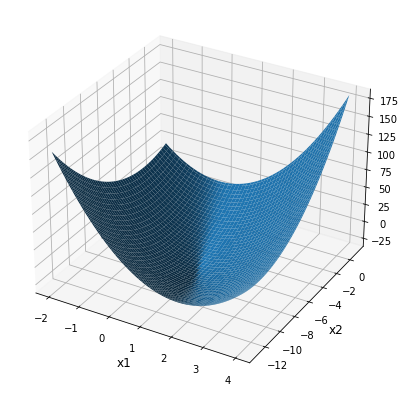

In [17]:
fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection='3d')

x = np.linspace(-2, 4, 100)
y = np.linspace(-13, 1, 100)

x, y = np.meshgrid(x, y)
z = function(x, y)

ax.plot_surface(x, y, z)
ax.set_xlabel('x1', fontsize = 12)
ax.set_ylabel('x2', fontsize = 12)

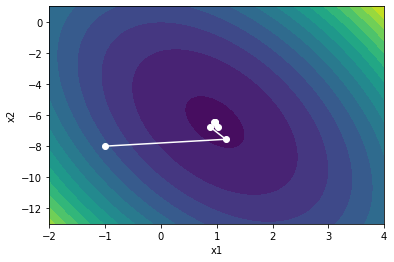

In [18]:
fig = plt.figure()

x = np.linspace(-2, 4, 100)
y = np.linspace(-13, 1, 100)

x, y = np.meshgrid(x, y)
z = function(x, y)

plt.contourf(x, y, z, 15)
plt.plot(x0, y0, 'o-', color='white')
plt.xlabel('x1')
plt.ylabel('x2')

steps = np.matrix(steps)
plt.plot(steps[:,0], steps[:,1], '-o', color='white')